# Importation des librairies

In [9]:
!pip install category_encoders wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

  Using cached category_encoders-2.3.0-py2.py3-none-any.whl (82 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161113 sha256=9619cf33e40f68714c5321137a5e8ac6041cdb4a863a556e026f5c4cde9f9295
  Stored in directory: c:\users\f.amine\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


# Chargement des données

In [10]:
dataset = pd.read_csv('Train_dataset2.csv', encoding='cp1252')

In [11]:
dataset.head(10)

,sentence,word,index,label
0,In 1832 his family emigrated thence to Bellevi...,thence,5.0,1
1,In 1832 his family emigrated thence to Bellevi...,apprenticed,13.0,1
2,In 1832 his family emigrated thence to Bellevi...,family,3.0,0
3,In 1832 his family emigrated thence to Bellevi...,emigrated,4.0,0
4,In 1832 his family emigrated thence to Bellevi...,printer,16.0,0
5,In 1832 his family emigrated thence to Bellevi...,town,19.0,0
6,In 1832 his family emigrated thence to Bellevi...,newspaper,20.0,0
7,"Leo , on December 23 , took an oath of purgati...",exiled,22.0,1
8,"Leo , on December 23 , took an oath of purgati...",oath,8.0,1
9,"Leo , on December 23 , took an oath of purgati...",purgation,10.0,1


In [12]:
dataset.shape

(2680, 4)

In [13]:
temp = dataset.groupby('label').count()['word'].reset_index().sort_values(by='word', ascending=False)  
temp

,label,word
0,0,1531
1,1,1148


D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


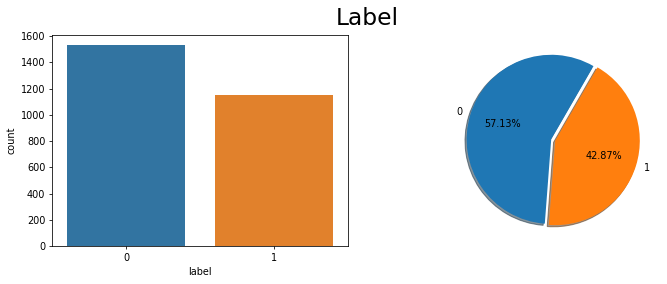

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=70)
sns.countplot(dataset['label'], ax=axes[0])
axes[1].pie(dataset['label'].value_counts(),
            labels=["0", "1"],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Label', fontsize=24)
plt.show()

In [15]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.label == 1].word))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Complex words')

TypeError: sequence item 953: expected str instance, float found

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Simple words')

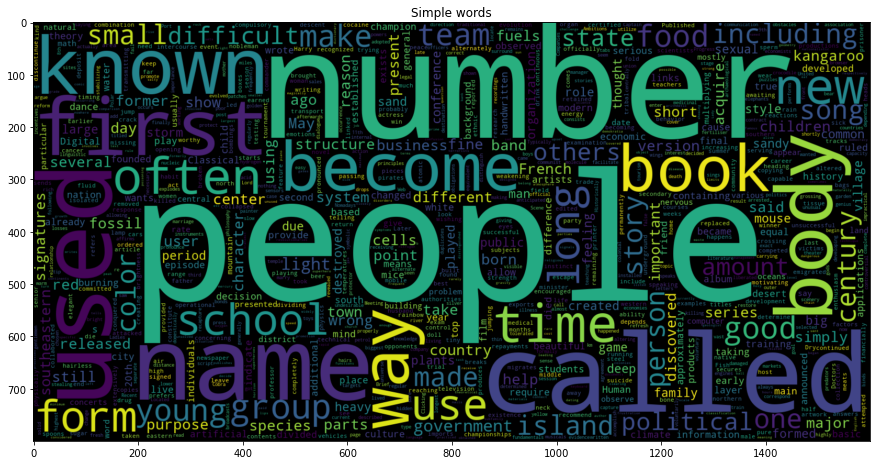

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.label == 0].word))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Simple words')

# Vectorisation

In [17]:
import category_encoders as ce
import pandas as pd


#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='word',handle_unknown='return_nan',return_df=True,use_cat_names=True)

data = encoder.fit_transform(dataset)
data

,sentence,word_thence,word_apprenticed,word_family,word_emigrated,word_printer,word_town,word_newspaper,word_exiled,word_oath,...,word_syncope,word_cachexia,word_dialysis,word_Blood flow restriction,word_BFR,word_randomized clinical trials,word_standardized mean difference,word_hypertension,index,label
0,In 1832 his family emigrated thence to Bellevi...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
1,In 1832 his family emigrated thence to Bellevi...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1
2,In 1832 his family emigrated thence to Bellevi...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
3,In 1832 his family emigrated thence to Bellevi...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0
4,In 1832 his family emigrated thence to Bellevi...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,Randomized clinical trials that compared resis...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,1
2676,The pooled standardized mean difference (SMD) ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1
2677,The management of this condition is given the ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1
2678,This review recommends safe and effective whol...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1


# Data splitting

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop(["label","index", "sentence"],axis = 1)
Y = data.label
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (2144, 1760)
y_train :  (2144,)
x_test :  (536, 1760)
y_test :  (536,)


In [19]:
#x_train
#y_train

In [20]:
# train_x = pd.get_dummies(x_train)
# test_x =  pd.get_dummies(x_test)
# print(train_x.shape)
#x_test

# SVM 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)


y_pred = grid.predict(x_test)
ypred = pd.DataFrame(y_pred)
report = classification_report(y_test, ypred)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=  10.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   8.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   7.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   7.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   7.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   7.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   7.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   7.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   8.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   8.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.580 total time=   9.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.669 total time=   7.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.641 total time=   6.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   7.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=   6.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   6.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   7.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.641 total time=   6.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   7.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.671 total time=   6.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   7.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.669 total time=   6.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.641 total time=   6.7s
[CV 4/5] END ....C=1000, gam

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [50]:
from sklearn import svm
from sklearn.metrics import classification_report
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
ypred = pd.DataFrame(y_pred)
report = classification_report(y_test, ypred)


In [57]:
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [59]:
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,286,4
1,187,59


# logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred_lg = model.predict(x_test)
ypred = pd.DataFrame(y_pred_lg)
report = classification_report(y_test, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [68]:
pd.crosstab(y_test,y_pred_lg, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,286,4
1,187,59


# Modelisation

In [22]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [28]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [29]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [30]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [33]:
dict_of_models = {'RandomForest': RandomForest,
#                   'AdaBoost' : AdaBoost,
#                   'SVM': SVM,
#                   'KNN': KNN
                 }

In [34]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest


MemoryError: Unable to allocate 24.8 GiB for an array with shape (2144, 1551440) and data type float64